In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

qaanaaq gl
rikitea pf
saskylakh ru
san fernando mx
yellowknife ca
whitecourt ca
cartagena es
prainha br
hamm de
rikitea pf
puerto ayora ec
hami cn
ranong th
tilichiki ru
taltal cl
gorontalo id
tuktoyaktuk ca
punta arenas cl
rikitea pf
rincon an
hamilton bm
cockburn town bs
tuktoyaktuk ca
hobart au
mahebourg mu
ilulissat gl
new norfolk au
cuxhaven de
sosenskiy ru
punta arenas cl
rikitea pf
chokurdakh ru
port alfred za
hermanus za
ust-kulom ru
taolanaro mg
mullaitivu lk
nanortalik gl
yerbogachen ru
camacha pt
okhotsk ru
longyearbyen sj
mataura pf
bluff nz
tabuk sa
kuanshan tw
punta arenas cl
hermanus za
busselton au
nikolskoye ru
saint-pierre pm
massakory td
port alfred za
dikson ru
cherskiy ru
hamilton bm
college us
guerrero negro mx
kuytun ru
bonthe sl
victoria sc
sao filipe cv
esperance au
vila velha br
bethel us
coruripe br
mar del plata ar
taolanaro mg
beringovskiy ru
denpasar id
punta arenas cl
vaini to
dryden ca
abbeville us
dukat ru
baijiantan cn
araouane ml
yellowknife ca
el alt

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime
import time

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
len(cities)

626

In [14]:
# for i, city in enumerate(cities):
    # city_url = url + "&q=" + city.replace(" ","+")
   #  print(city_url)

In [15]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(65)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

2 of Set 4 | magadan
Processing Record 23 of Set 4 | alotau
City not found. Skipping...
Processing Record 24 of Set 4 | cuyamel
Processing Record 25 of Set 4 | lebu
Processing Record 26 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 27 of Set 4 | saleaula
City not found. Skipping...
Processing Record 28 of Set 4 | palmer
Processing Record 29 of Set 4 | ossora
Processing Record 30 of Set 4 | bafq
Processing Record 31 of Set 4 | ust-omchug
Processing Record 32 of Set 4 | fort stewart
Processing Record 33 of Set 4 | uyemskiy
Processing Record 34 of Set 4 | tabas
Processing Record 35 of Set 4 | samusu
City not found. Skipping...
Processing Record 36 of Set 4 | christchurch
Processing Record 37 of Set 4 | san pedro
Processing Record 38 of Set 4 | nayoro
Processing Record 39 of Set 4 | avarua
Processing Record 40 of Set 4 | quesnel
Processing Record 41 of Set 4 | chernyshevskiy
Processing Record 42 of Set 4 | dibaya
City not found. Skipping...
Processing Record 43 

In [16]:
len(city_data)

572

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.48,-69.36,30.56,85,45,6.87,GL,2020-10-14 19:54:27
1,Rikitea,-23.12,-134.97,73.63,80,27,19.46,PF,2020-10-14 19:54:27
2,Saskylakh,71.92,114.08,15.60,95,100,15.95,RU,2020-10-14 19:54:27
3,San Fernando,15.03,120.69,77.00,88,90,2.24,PH,2020-10-14 19:54:28
4,Yellowknife,62.46,-114.35,26.01,68,90,23.04,CA,2020-10-14 19:54:28
5,Whitecourt,54.15,-115.69,37.40,62,75,6.93,CA,2020-10-14 19:54:28
6,Cartagena,10.40,-75.51,82.40,83,40,1.12,CO,2020-10-14 19:52:51
7,Prainha,-1.80,-53.48,94.87,37,100,7.72,BR,2020-10-14 19:54:28
8,Hamm,51.68,7.82,48.20,81,90,8.05,DE,2020-10-14 19:54:28
9,Puerto Ayora,-0.74,-90.35,77.00,73,75,8.05,EC,2020-10-14 19:54:28


In [18]:
# Create the output file (CSV).
output_data_file = "C:/Users/golfz/Documents/GitHub/World_Weather_Analysis/weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1602708125.7958834

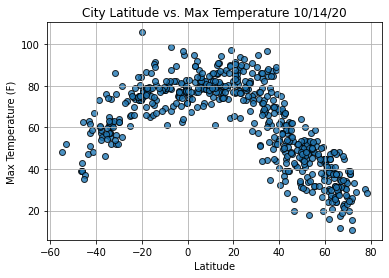

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

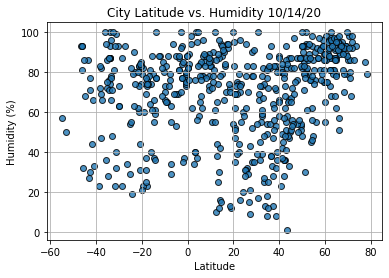

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()